### 12_LSTM_stock_reuters
from sklearn.preprocessing import MinMaxScaler  
x_train_set = MinMaxScaler().fit_transform(x_train_set)  
keras.datasets.reuters.load_data(num_words=top_words)  
word_index = reuters.get_word_index()  
decode_word_map = dict([(value, key) for (key, value) in word_index.items()]) 

In [1]:
import os, sys
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, UpSampling2D
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import imdb
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [3]:
seed = 7
np.random.seed(seed)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print("X_train.shape",X_train.shape)
model = Sequential()
model.add(LSTM(28, input_shape=(X_train.shape[1:]), activation="relu", return_sequences=True))
model.add(LSTM(28, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(Y_train.shape[1], activation="softmax"))
model.summary()

# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=3, batch_size=128, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

X_train.shape (60000, 28, 28)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 28, 28)            6384      
_________________________________________________________________
lstm_3 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout_2 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                928       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 14,026
Trainable params: 14,026
Non-trainable params: 0
____________________

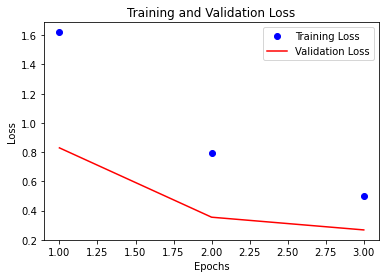

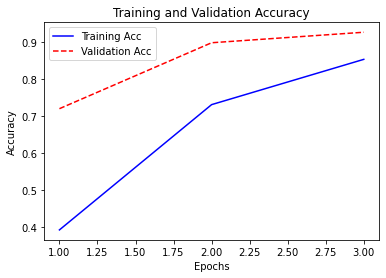

In [4]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 沒用 to_categorical(Y_train)

In [6]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
# 定義模型
model = Sequential()
model.add(LSTM(28, input_shape=(X_train.shape[1:]), activation="relu", 
               return_sequences=True))
model.add(LSTM(28, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=3, batch_size=128, verbose=2)
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 28, 28)            6384      
_________________________________________________________________
lstm_7 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout_6 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                928       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 14,026
Trainable params: 14,026
Non-trainable params: 0
__________________________________________________

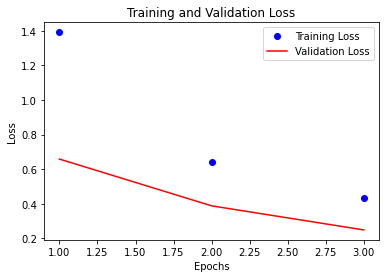

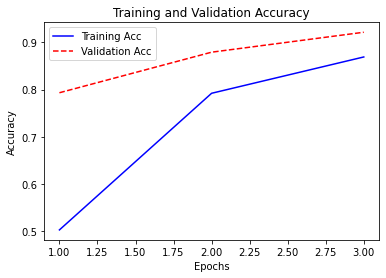

In [7]:
# 顯示訓練和驗證損失圖表
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 載入Google股價的訓練資料集

In [8]:
df_train = pd.read_csv(os.path.join(".","train_data","GOOG_Stock_Price_Train.csv"),
                       index_col="Date",parse_dates=True)
print(df_train.head())
#df_train.head().to_html("Ch12_2_1.html")

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03  324.360352  331.916199  324.077179  330.555054  330.555054   
2012-01-04  330.366272  332.959412  328.175537  331.980774  331.980774   
2012-01-05  328.925659  329.839722  325.994720  327.375732  327.375732   
2012-01-06  327.445282  327.867523  322.795532  322.909790  322.909790   
2012-01-09  321.161163  321.409546  308.607819  309.218842  309.218842   

              Volume  
Date                  
2012-01-03   7400800  
2012-01-04   5765200  
2012-01-05   6608400  
2012-01-06   5420700  
2012-01-09  11720900  


In [9]:
X_train_set = df_train.iloc[:,4:5].values
X_train_len = len(X_train_set)
print("筆數: ", X_train_len)
# 產生特徵資料和標籤資料
def create_dataset(ds, look_back=1):
    X_data, Y_data = [], []
    for i in range(len(ds)-look_back):
        X_data.append(ds[i:(i+look_back), 0])
        Y_data.append(ds[i+look_back, 0])
    return np.array(X_data), np.array(Y_data)

look_back = 60
X_train, Y_train = create_dataset(X_train_set, look_back)
print("回看天數:", look_back)
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print(X_train[0])
print(X_train[1])
print(Y_train[0])

筆數:  1258
回看天數: 60
X_train.shape:  (1198, 60)
Y_train.shape:  (1198,)
[330.555054 331.980774 327.375732 322.90979  309.218842 309.556641
 310.95752  312.785645 310.475647 312.259064 314.410065 317.718536
 291.101654 290.868195 288.588013 282.904968 282.214478 288.116089
 286.978485 288.180664 288.53833  290.66452  296.238251 302.577026
 301.42453  302.954559 303.754364 300.997314 304.121979 302.909851
 300.823425 301.300323 300.366394 305.016174 302.005737 301.096649
 302.979401 302.68631  307.196991 307.127441 309.189026 308.617737
 305.14035  300.52536  301.439423 301.608337 298.185577 300.619751
 306.893951 306.00473  308.558136 310.500488 314.94162  314.698181
 317.922211 320.937622 319.218781 322.567017 321.419464 325.76123 ]
[331.980774 327.375732 322.90979  309.218842 309.556641 310.95752
 312.785645 310.475647 312.259064 314.410065 317.718536 291.101654
 290.868195 288.588013 282.904968 282.214478 288.116089 286.978485
 288.180664 288.53833  290.66452  296.238251 302.577026 301

In [10]:
from sklearn.preprocessing import MinMaxScaler
### 特徵標準化 - 正規化
sc = MinMaxScaler() 
X_train_set = sc.fit_transform(X_train_set)

look_back = 60
print("回看天數:", look_back)
# 分割成特徵資料和標籤資料
X_train, Y_train = create_dataset(X_train_set, look_back)
# 轉換成(樣本數, 時步, 特徵)張量
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
# 定義模型
model = Sequential()
model.add(LSTM(50, return_sequences=True, 
               input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="mse", optimizer="adam")
# 訓練模型
model.fit(X_train, Y_train, epochs=3, batch_size=32)

回看天數: 60
X_train.shape:  (1198, 60, 1)
Y_train.shape:  (1198,)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________

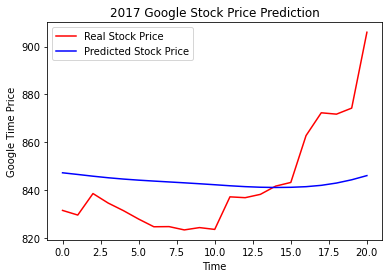

In [12]:
# 使用模型預測股價 - 2017年1~3月預測 4 月份股價
df_test = pd.read_csv(os.path.join(".","train_data","GOOG_Stock_Price_Test.csv"))
X_test_set = df_test.iloc[:,4:5].values
# 產生特徵資料和標籤資料
X_test, Y_test = create_dataset(X_test_set, look_back)
X_test = sc.transform(X_test)
# 轉換成(樣本數, 時步, 特徵)張量
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test_pred = model.predict(X_test)
# 將預測值轉換回股價
X_test_pred_price = sc.inverse_transform(X_test_pred)
# 繪出股價圖表

plt.plot(Y_test, color="red", label="Real Stock Price")
plt.plot(X_test_pred_price, color="blue", label="Predicted Stock Price")
plt.title("2017 Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Time Price")
plt.legend()
plt.show()

# reuters 新聞評論

In [18]:
# 載入 Reuters 資料集, 如果是第一次載入會自行下載資料集
top_words = 10000
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(
                                       num_words=top_words)
# 形狀
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)
# 顯示 Numpy 陣列內容
print(X_train[0])
print(Y_train[0])   # 標籤資料

X_train.shape:  (8982,)
Y_train.shape:  (8982,)
X_test.shape:  (2246,)
Y_test.shape:  (2246,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


C:\Users\lucif\.conda\envs\tf20\lib\site-packages\tensorflow_core\python\keras\datasets\reuters.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\lucif\.conda\envs\tf20\lib\site-packages\tensorflow_core\python\keras\datasets\reuters.py:114: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [15]:
# 最大的單字索引值
max_index = max(max(sequence) for sequence in X_train)
print("Max Index: ", max_index)
# 建立新聞的解碼字典
word_index = reuters.get_word_index()
we_index = word_index["we"]
print("'we' index:", we_index)
decode_word_map = dict([(value, key) for (key, value)
                                  in word_index.items()])
print(decode_word_map[we_index])
print("decode_word_map: ",len(decode_word_map))
# 解碼顯示新聞內容
decoded_indices = [decode_word_map.get(i-3, "?")
                           for i in X_train[0]]
print(decoded_indices)
decoded_news = " ".join(decoded_indices)
print(decoded_news)

Max Index:  9999
557056/550378 [==============================] - 0s 1us/step
'we' index: 112
we
decode_word_map:  30979
['?', '?', '?', 'said', 'as', 'a', 'result', 'of', 'its', 'december', 'acquisition', 'of', 'space', 'co', 'it', 'expects', 'earnings', 'per', 'share', 'in', '1987', 'of', '1', '15', 'to', '1', '30', 'dlrs', 'per', 'share', 'up', 'from', '70', 'cts', 'in', '1986', 'the', 'company', 'said', 'pretax', 'net', 'should', 'rise', 'to', 'nine', 'to', '10', 'mln', 'dlrs', 'from', 'six', 'mln', 'dlrs', 'in', '1986', 'and', 'rental', 'operation', 'revenues', 'to', '19', 'to', '22', 'mln', 'dlrs', 'from', '12', '5', 'mln', 'dlrs', 'it', 'said', 'cash', 'flow', 'per', 'share', 'this', 'year', 'should', 'be', '2', '50', 'to', 'three', 'dlrs', 'reuter', '3']
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six 

In [19]:
max_words = 200 
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# One-hot編碼
Y_train = to_categorical(Y_train, 46)
Y_test = to_categorical(Y_test, 46)
# 定義模型
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(46, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=3, batch_size=32, verbose=2)
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 32)           320000    
_________________________________________________________________
dropout_15 (Dropout)         (None, 200, 32)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 200, 32)           8320      
_________________________________________________________________
lstm_16 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_16 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 46)                1518      
Total params: 338,158
Trainable params: 338,158
Non-trainable params: 0
________________________________________________

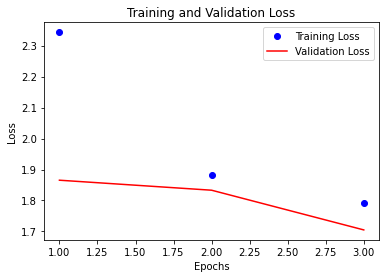

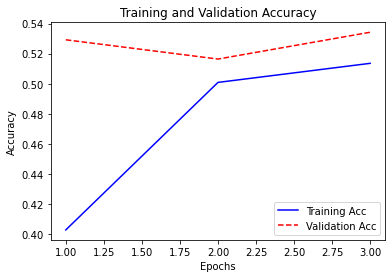

In [20]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()